# Линейные модели для классификации

In [1]:
import pandas as pd
import numpy as np

Для линейных моделей регрессии выход
является линейной 
функцией признаков: линией, плоскостью или гиперплоскостью (для 
большого количества измерений). Для линейных моделей 
классификации граница принятия решений (decision boundary) является 
линейной функцией аргумента. Другими словами, (бинарный) линейный
классификатор – это классификатор, который разделяет два класса с 
помощью линии, плоскости или гиперплоскости.

##### Существует масса алгоритмов обучения линейных моделей. Два критерия задают различия между алгоритмами:
- Измеряемые метрики качества подгонки обучающих данных;
- Факт использования регуляризации и вид регуляризации, если она 
используется.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
canser_info = load_breast_cancer()  # данные об опухолях и медицинских признаках 
canser_info.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
canser_data = pd.DataFrame(canser_info.data, columns=canser_info.feature_names)
canser_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
canser_target = canser_info.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(canser_data,canser_target,random_state=42)

### *Логистическая регрессия* и *метод опорных векторов* для **бинарной классификации**

Логистическая регрессия - это метод статистического анализа, используемый для прогнозирования вероятности возникновения события на основе одного или нескольких предикторов. Основная идея заключается в том, чтобы оценить вероятность принадлежности к определенному классу (обычно два класса) путем применения логистической функции к комбинации линейных предикторов.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression().fit(X_train, y_train)  # по умолчанию C=1 и используется penalty=l2 регуляризация

print(f'Правильность на тестовой выборке: {log_reg.score(X_train, y_train):.3f}')
print(f'Правильность на тестовой выборке: {log_reg.score(X_test, y_test):.3f}')

Правильность на тестовой выборке: 0.946
Правильность на тестовой выборке: 0.958


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Заметим, что при достаточно одинаковом качестве И на тестовом наборе, И на обучающем, то модель, скорее, **НЕДООБУЧЕНА** 

Для LogisticRegression и LinearSVC *компромиссный параметр, 
который определяет степень регуляризации*, **называется C, и более 
высокие значения C соответствуют меньшей регуляризации**. 
- - - - - -  -
Другими словами, когда вы используете высокое значение параметра C, 
LogisticRegression и LinearSVC пытаются подогнать модель к 
обучающим данным как можно лучше, тогда как при низких значениях 
параметра C модели делают больший акцент на поиске вектора 
коэффициентов (w), близкого к нулю.

In [9]:
# более гибкая модель

log_reg = LogisticRegression(C=100)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
print(f'Правильность на тестовой выборке: {log_reg.score(X_train, y_train):.3f}')
print(f'Правильность на тестовой выборке: {log_reg.score(X_test, y_test):.3f}')

Правильность на тестовой выборке: 0.941
Правильность на тестовой выборке: 0.965


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# более общая и недообученная модель с регуляризацией L1

log_reg = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
print(f'Правильность на тестовой выборке: {log_reg.score(X_train, y_train):.3f}')
print(f'Правильность на тестовой выборке: {log_reg.score(X_test, y_test):.3f}')

Правильность на тестовой выборке: 0.911
Правильность на тестовой выборке: 0.951


Существует еще одна интересная деталь, связанная с работой
параметра C. Использование низких значений C приводит к тому, что
алгоритмы пытаются подстроиться под «большинство» точек данных, 
тогда как использование более высоких значений C подчеркивает 
важность того, чтобы каждая отдельная точка данных была
классифицирована правильно

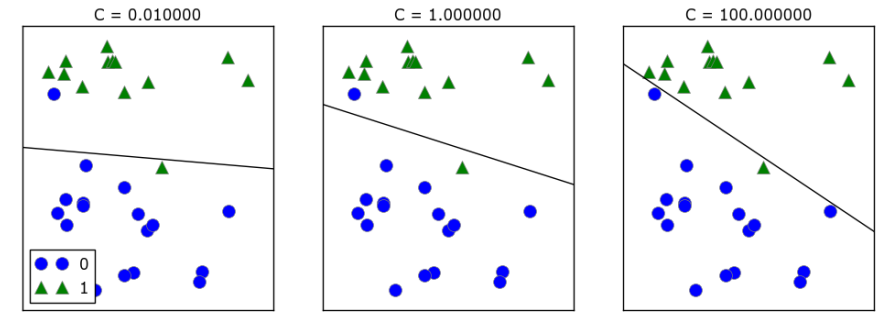

In [11]:
from sklearn.svm import LinearSVC # линейный метод опорных векторов (linear support vector machines) 

## Линейный метод опорных векторов (Linear Support Vector Machines, Linear SVM):
#### Как работает:
Линейный SVM - это метод, который строит гиперплоскость, разделяющую данные в пространстве признаков таким образом, чтобы максимизировать зазор между классами. Гиперплоскость определяется так, чтобы она была как можно дальше от ближайших точек обоих классов, которые называются опорными векторами.
Коэффициенты гиперплоскости и веса опорных векторов: Аналогично линейной регрессии, определяют форму гиперплоскости.

**Переобучение и недообучение**:
- Переобучение: Возможно, когда данные линейно неразделимы и модель стремится максимизировать зазор, допуская ошибки классификации (мягкая граница).
- Недообучение: Возможно, когда данные сложны и нелинейны, а модель использует слишком простую гиперплоскость.

Выбор параметров:
- Параметр регуляризации C: *Определяет компромисс между максимизацией зазора и минимизацией ошибок классификации*. 
Маленькое значение C сделает зазор более широким, позволяя большему числу ошибок, тогда как большое значение C будет стремиться к правильной классификации за счет уменьшения зазора.

In [12]:
svc = LinearSVC(C=100, penalty='l2')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

print(f'Правильность на тестовой выборке: {log_reg.score(X_train, y_train):.3f}')
print(f'Правильность на тестовой выборке: {log_reg.score(X_test, y_test):.3f}')

Правильность на тестовой выборке: 0.911
Правильность на тестовой выборке: 0.951


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Мультиклассовая классификация в линейных моделях

Многие линейные модели классификации предназначены лишь для 
бинарной классификации и не распространяются на случай 
мультиклассовой классификации (за исключением логистической 
регрессии). 
- - - -  - -
Общераспространненный подход, позволяющий 
распространить алгоритм бинарной классификации на случай
мультиклассовой классификации называет подходом **«один против 
остальных»** (one-vs.-rest).В подходе «один против остальных» для
каждого класса строится бинарная модель, которая пытается отделить 
этот класс от всех остальных, в результате чего **количество моделей
определяется количеством классов**. Для получения прогноза точка 
тестового набора подается на все бинарные классификаторы.
Классификатор, который выдает по своему классу наибольшее значение,
«побеждает» и метка этого класса возвращается в качестве прогноза.


In [13]:
from sklearn.datasets import load_iris
iris_info = load_iris()
iris_data = iris_info.data
iris_target = iris_info.target

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(iris_data,iris_target,random_state=42)

In [15]:
lin_svc = LinearSVC().fit(X_train1, y_train1)
lin_svc.score(X_test1, y_test1)

print(f'Правильность на обучающей выборке: {lin_svc.score(X_train1, y_train1):.3f}')
print(f'Правильность на тестовой выборке: {lin_svc.score(X_test1, y_test1):.3f}')

Правильность на обучающей выборке: 0.973
Правильность на тестовой выборке: 1.000


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
lin_svc.coef_  # три вектора  для каждого класса ириса

array([[ 0.18423782,  0.45122832, -0.80793795, -0.4507124 ],
       [ 0.093851  , -0.93127865,  0.31215102, -0.79639569],
       [-0.74448259, -1.2065005 ,  1.36540219,  1.58120706]])

In [17]:
lin_svc.intercept_  # три свободных члена для каждого класса

array([ 0.10956229,  1.74723155, -1.23709257])

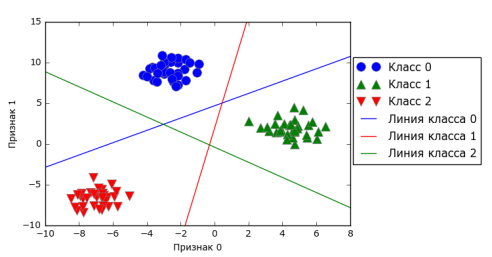

Линейные модели очень быстро обучаются, а также быстро 
прогнозируют. Они масштабируются на очень большие наборы данных, 
а также хорошо работают с разреженными данными. При работе с 
данными, состоящими из сотен тысяч или миллионов примеров, вас, 
возможно, заинтересует опция solver='sag' в LogisticRegression и 
Ridge, которая позволяет получить результаты быстрее, чем настройки 
по умолчанию. Еще пара опций – это класс SGDClassifier и класс 
SGDRegressor, реализующие более масштабируемые версии описанных 
здесь линейных моделей

In [18]:
log_reg_multy = LogisticRegression().fit(X_train1,y_train1)
log_reg_multy.score(X_test1, y_test1)

print(f'Правильность на тестовой выборке: {log_reg_multy.score(X_train1, y_train1):.3f}')
print(f'Правильность на тестовой выборке: {log_reg_multy.score(X_test1, y_test1):.3f}')

Правильность на тестовой выборке: 0.964
Правильность на тестовой выборке: 1.000


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
log_reg_multy.coef_

array([[-0.38920594,  0.91995878, -2.33120466, -0.98315385],
       [ 0.49927579, -0.30953763, -0.21518068, -0.73387454],
       [-0.11006984, -0.61042115,  2.54638534,  1.71702838]])

Математический аппарат мультиклассовой логистической регрессии 
несколько отличается от подхода «один против остальных», однако он
также дает один вектор коэффициентов и константу для каждого класса
и использует тот же самый способ получения прогнозов.

## Наивные байесовские классификаторы

Наивные байесовские классификаторы представляют собой семейство 
классификаторов, которые очень схожи с линейными моделями, 
рассмотренными в предыдущем разделе. **Однако они имеют тенденцию
обучаться быстрее**. 
- Цена, которую приходится платить за такую 
эффективность – немного более низкая обобщающая способность
моделей Байеса по сравнению с линейными классификаторами типа
LogisticRegression и LinearSVC.


В scikit-learn реализованы три вида наивных байесовских 
классификаторов: GaussianNB, BernoulliNB и MultinomialNB. GaussianNB
можно применить к любым непрерывным данным, в то время как 
BernoulliNB принимает бинарные данные, MultinomialNB принимает 
счетные или дискретные данные (то есть каждый признак представляет 
собой подсчет целочисленных значений какой-то характеристики, 
84
например, речь может идти о частоте встречаемости слова в 
предложении). BernoulliNB и MultinomialNB в основном используются 
для классификации текстовых данных.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaus_clf = GaussianNB().fit(X_train1,y_train1)
gaus_clf.score(X_test1, y_test1)

print(f'Правильность на тестовой выборке: {gaus_clf.score(X_train1, y_train1):.3f}')
print(f'Правильность на тестовой выборке: {gaus_clf.score(X_test1, y_test1):.3f}')

### Преимущества наивных байесвоских классификаторов:
- скорость
- простота

### Недостатки:
- низкая точность на сложных задачах
- чувствительность к качеству данных

#### Где применять:
- текстовая классификация
- работа с категориальными данными
- простые задачи 
- большой объем данных, где требуется скорость